# A1 - Predicting Car Prices

# Task 1

## Required Imports

In [771]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [772]:
df = pd.read_csv('Cars.csv')

In [773]:
df.head()  # Display the first few rows of the DataFrame

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


In [774]:
# Check the shape of your data
df.shape

(8128, 13)

In [775]:
df.describe()  # Get a statistical summary of the DataFrame

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


In [776]:
df.info()  # Get information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [777]:
df.columns  # List all columns in the DataFrame

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [778]:
# Rename the 'name' column to 'brand'
df = df.rename(columns={'name':'brand'})

In [779]:
#
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [780]:
# Map owner status to numbers
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df['owner'] = df['owner'].replace(owner_mapping)
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [781]:
# Looking at the unique values in the 'fuel' column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [782]:
# Removing rows with 'LPG' and 'CNG' fuel types as they use different milage systems
df = df[df["fuel"] != 'LPG']
df = df[df["fuel"] != 'CNG']
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [783]:
# Extract numeric part and convert mileage to float variable
df['mileage'] = df.mileage.str.split(' ', expand=True)[0].astype(float) 
df['mileage'].head()


0   23.40
1   21.14
2   17.70
3   23.00
4   16.10
Name: mileage, dtype: float64

In [784]:
# Extract numeric part and convert engine to float variable
df['engine'] = df.engine.str.split(' ', expand=True)[0].astype(float)
df['engine'].head() 

0   1248.00
1   1498.00
2   1497.00
3   1396.00
4   1298.00
Name: engine, dtype: float64

In [785]:
# Extract numeric part and convert max_power to float variable
df['max_power'] = df.max_power.str.split(' ', expand=True)[0].astype(float)
df['max_power'].head()

0    74.00
1   103.52
2    78.00
3    90.00
4    88.20
Name: max_power, dtype: float64

In [786]:
# Looking at the unique values in the 'brand' column
df.brand.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'],
      shape=(2018,), dtype=object)

In [787]:
# Extract the first word from the 'brand' column to get the car brand
df['brand'] = df['brand'].str.split(' ', n=1).str[0]
df.brand.head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

In [788]:
# Remove torque column
df.drop(columns=['torque'], inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.00,74.00,5.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.00,103.52,5.00
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.00,78.00,5.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.00,90.00,5.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.00,88.20,5.00


## 2. Exploratory Data Analysis

### Univariate analyis

#### Countplots

<Axes: xlabel='owner', ylabel='count'>

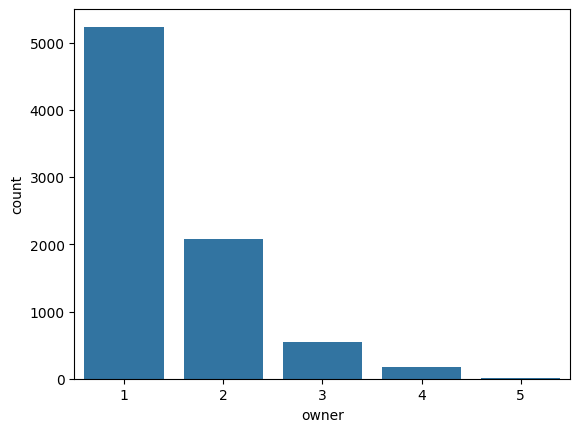

In [789]:
#Countplot for owner
sns.countplot(data = df, x = 'owner')

<Axes: xlabel='fuel', ylabel='count'>

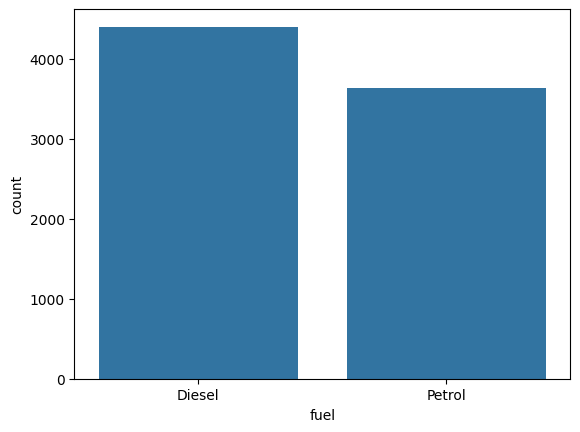

In [790]:
# Count plot for the 'Fuel_Type' column
sns.countplot(data = df, x = 'fuel')  

<Axes: xlabel='seller_type', ylabel='count'>

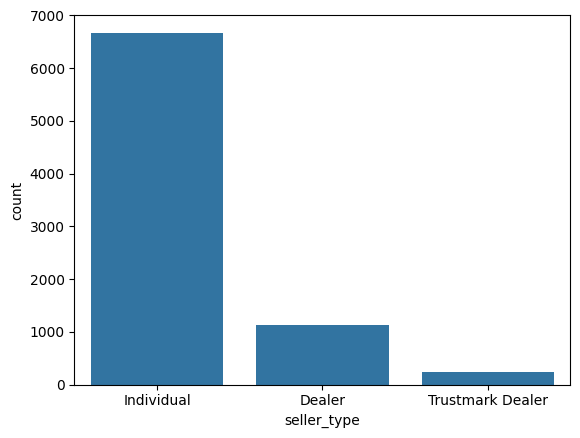

In [791]:
# Count plot for the 'seller_type' column
sns.countplot(data = df, x = 'seller_type') 

<Axes: xlabel='seats', ylabel='count'>

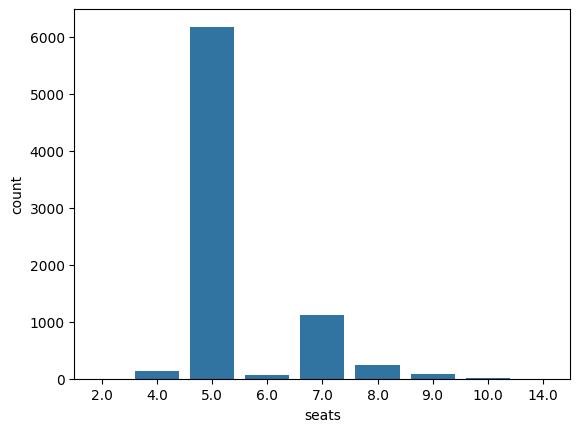

In [792]:
# Count plot for the 'seats' column
sns.countplot(data = df, x = 'seats')

### Multivariable Analysis

#### Boxplots 

Text(0.5, 0, 'Owner')

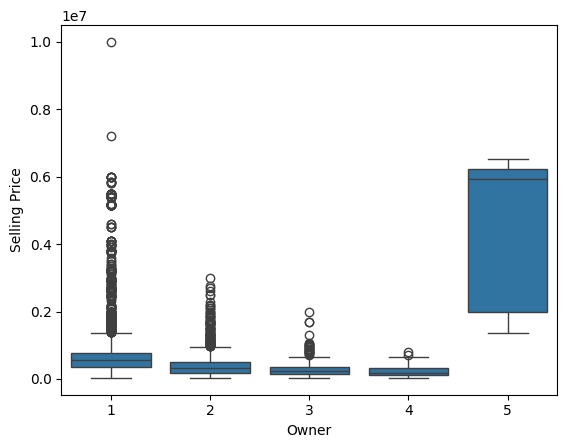

In [793]:
# Boxplot on "owner" and "selling_price"
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

Text(0.5, 0, 'Seller Type')

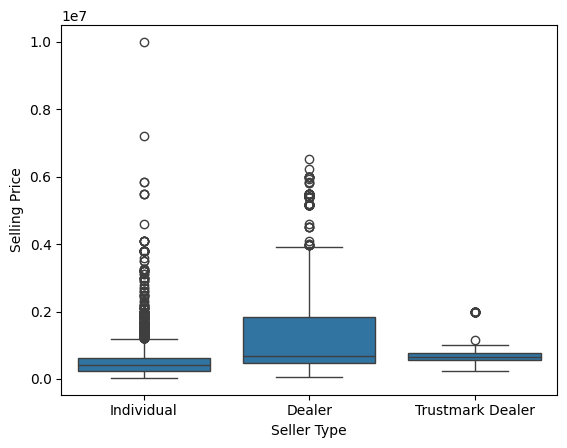

In [794]:
# Boxplot on "seller_type" and "selling_price"
sns.boxplot(x = df["seller_type"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

Text(0.5, 0, 'Seats')

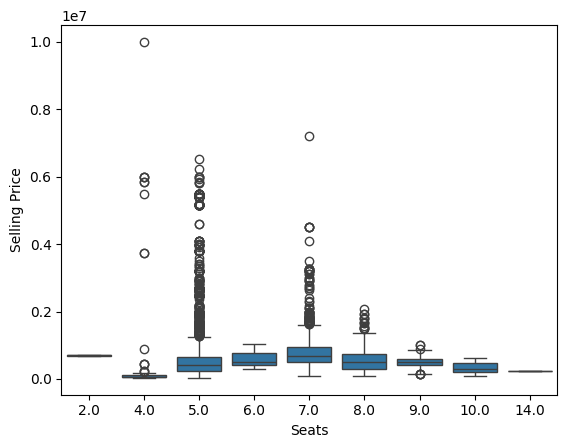

In [795]:
# Boxplot on "seats" and "selling_price"
sns.boxplot(x = df["seats"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Seats")

Text(0.5, 0, 'fuel')

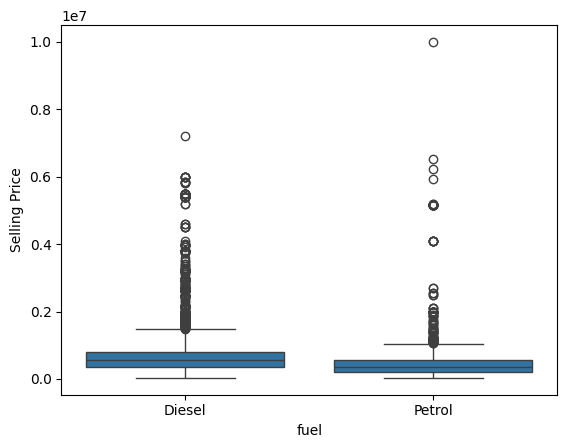

In [796]:
# Boxplot on "fuel" and "selling_price"
sns.boxplot(x = df["fuel"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("fuel")

Text(0.5, 0, 'Transmission')

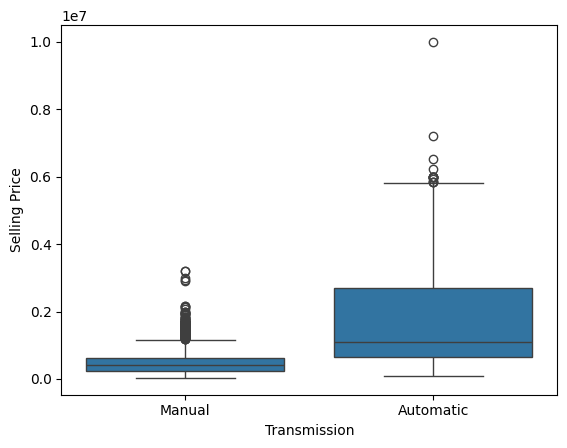

In [797]:
# Boxplot on "transmission" and "selling_price"
sns.boxplot(x = df["transmission"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Transmission")

Text(0.5, 0, 'seats')

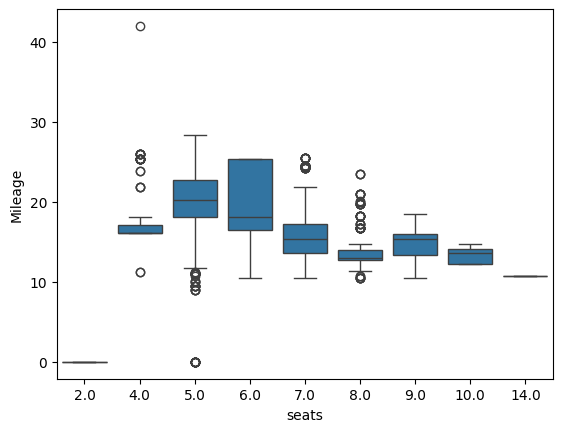

In [798]:
# Boxplot on "seats" and "mileage"
sns.boxplot(x = df["seats"], y = df["mileage"]);
plt.ylabel("Mileage")
plt.xlabel("seats")

Text(0.5, 0, 'Fuel')

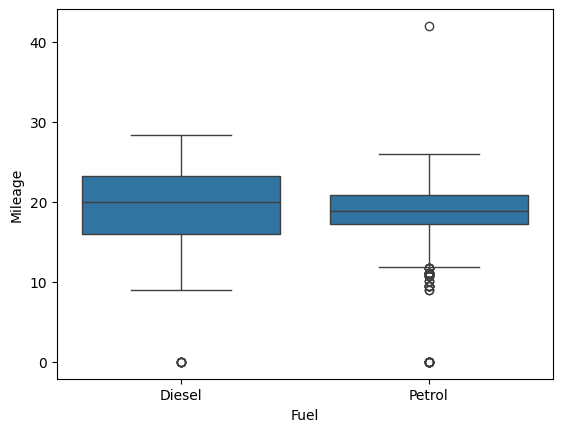

In [799]:
# Boxplot on "fuel" and "mileage"
sns.boxplot(x = df["fuel"], y = df["mileage"]);
plt.ylabel("Mileage")
plt.xlabel("Fuel")

Text(0.5, 0, 'Owner')

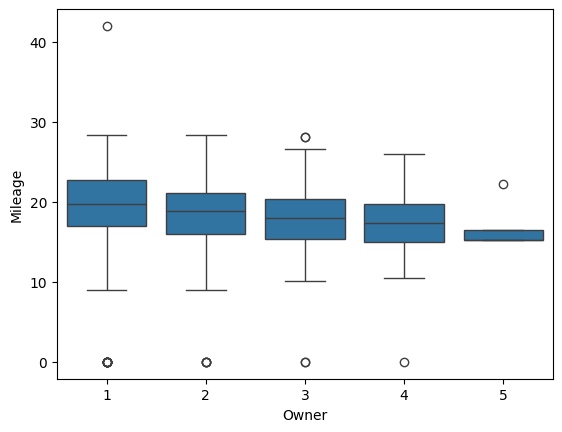

In [800]:
# Boxplot on "owner" and "mileage"
sns.boxplot(x = df["owner"], y = df["mileage"]);
plt.ylabel("Mileage")
plt.xlabel("Owner")

#### Scatter Plots

<Axes: xlabel='max_power', ylabel='selling_price'>

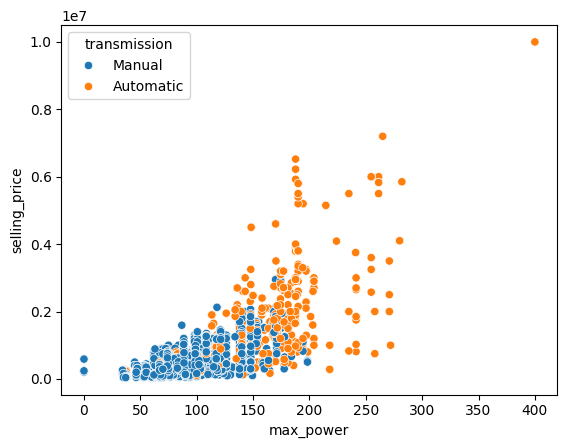

In [801]:
# Scatter plot for max_power vs selling_price with transmission as hue
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='year', ylabel='selling_price'>

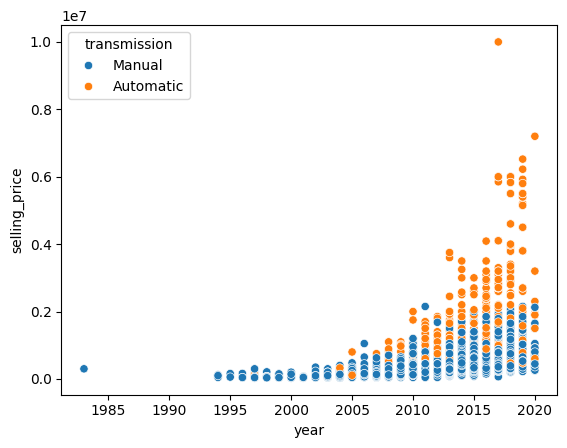

In [802]:
# Scatter plot for year vs selling_price with transmission as hue
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['transmission'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

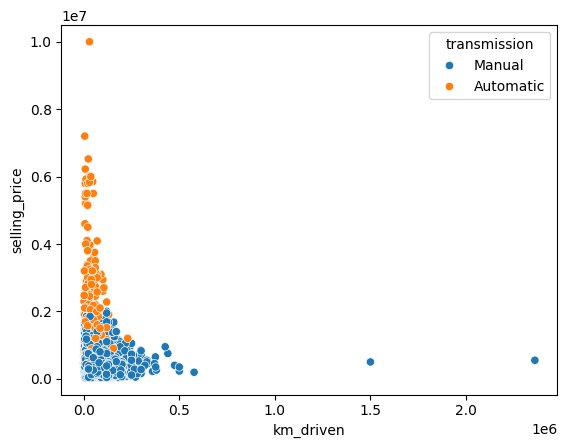

In [803]:
# Scatter plot for year vs selling_price with transmission as hue
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], hue=df['transmission'])

### Lable Encoding

In [804]:
# Count how many entries have 'owner' as Test Drive Car (5)
(df['owner'] == 5).sum()

np.int64(5)

In [805]:
# Removeing rows where 'owner' is Test Drive Car (5) 
# Bar plot on "owner" and "selling_price" shows that Test Drive Cars are very expensive 
# And from the above we can see that there are only 5 entries. So it is an outlier.
df = df[df["owner"] != 5]
df.owner.unique()

array([1, 2, 3, 4])

In [806]:
from sklearn.preprocessing import LabelEncoder

le_fuel = LabelEncoder()
le_transmission = LabelEncoder()
le_seller_type = LabelEncoder()
le_brand = LabelEncoder()

df["fuel"] = le_fuel.fit_transform(df["fuel"])
df["transmission"] = le_transmission.fit_transform(df["transmission"])
df["seller_type"] = le_seller_type.fit_transform(df["seller_type"])
df["brand"] = le_brand.fit_transform(df["brand"])

# Checking the classes for each label encoder
print(le_fuel.classes_)
print(le_transmission.classes_)
print(le_seller_type.classes_)
print(le_brand.classes_)


['Diesel' 'Petrol']
['Automatic' 'Manual']
['Dealer' 'Individual' 'Trustmark Dealer']
['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [807]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.00,74.00,5.00
1,27,2014,370000,120000,0,1,1,2,21.14,1498.00,103.52,5.00
2,10,2006,158000,140000,1,1,1,3,17.70,1497.00,78.00,5.00
3,11,2010,225000,127000,0,1,1,1,23.00,1396.00,90.00,5.00
4,20,2007,130000,120000,1,1,1,1,16.10,1298.00,88.20,5.00


#### Correlation Matrix 

<Axes: >

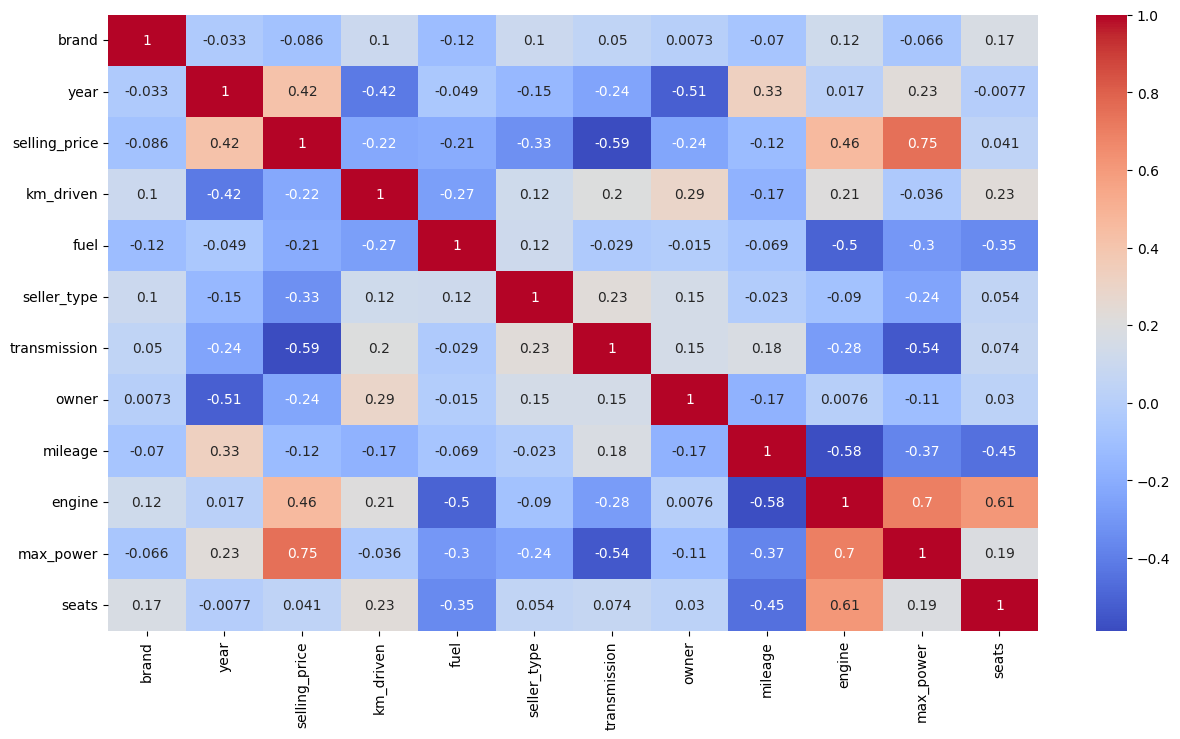

In [808]:
# Convolution martix
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  

In [809]:
# Convert encoded "brand" and  "seller_type" column back to original names
df["seller_type"] = le_seller_type.inverse_transform(df["seller_type"])
df["brand"] = le_brand.inverse_transform(df["brand"])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,Individual,1,1,23.40,1248.00,74.00,5.00
1,Skoda,2014,370000,120000,0,Individual,1,2,21.14,1498.00,103.52,5.00
2,Honda,2006,158000,140000,1,Individual,1,3,17.70,1497.00,78.00,5.00
3,Hyundai,2010,225000,127000,0,Individual,1,1,23.00,1396.00,90.00,5.00
4,Maruti,2007,130000,120000,1,Individual,1,1,16.10,1298.00,88.20,5.00


## 4. Feature Selection

In [810]:
from sklearn.model_selection import train_test_split

#X is our independant features
X = df[        ['max_power', 'km_driven', 'year']        ]


#Transforming y to log scale to reduce the skewness 
y = np.log(df["selling_price"])

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42) 
#splitting 10% of data for testing and 90% for training

## 5. Pre-processing

### Null Values

In [811]:
#Checking for null values in training set
X_train[['max_power', 'km_driven', 'year']].isna().sum()

max_power    193
km_driven      0
year           0
dtype: int64

In [812]:
#Checking for null values in test set
X_test[['max_power', 'km_driven', 'year']].isna().sum()

max_power    15
km_driven     0
year          0
dtype: int64

In [813]:
#Checking for null values in y_train
y_train.isna().sum()

np.int64(0)

In [814]:
y_test.isna().sum()

np.int64(0)

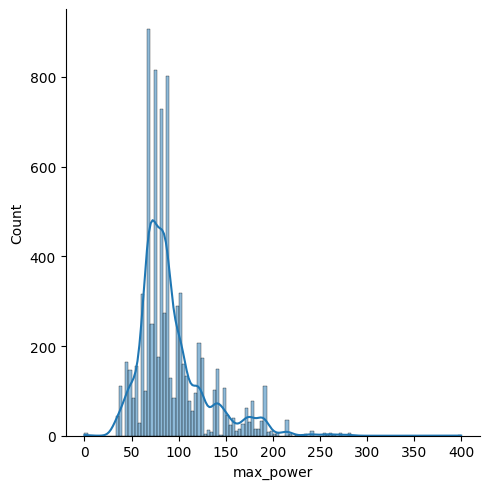

In [815]:
sns.displot(data=df, x='max_power', kde=True)

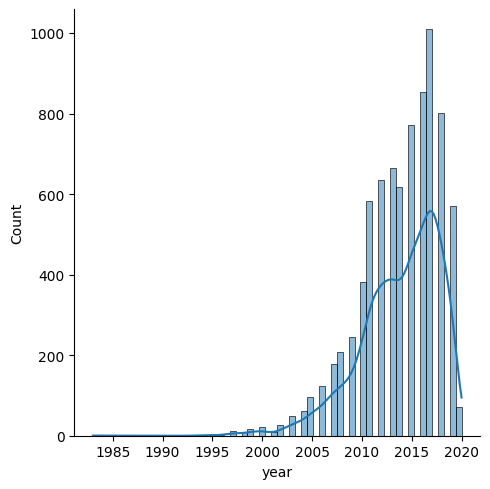

In [816]:
sns.displot(data=df, x='year', kde=True)

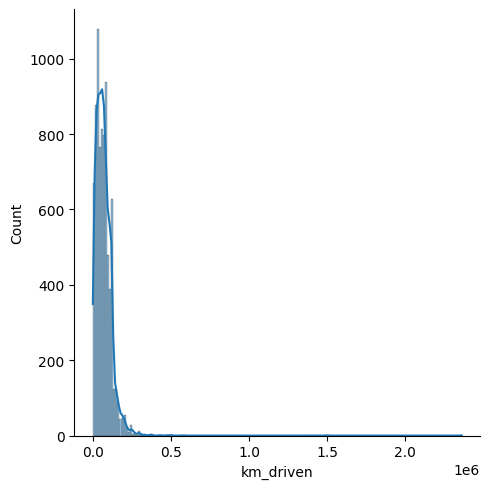

In [817]:

sns.displot(df['km_driven'], kde=True)

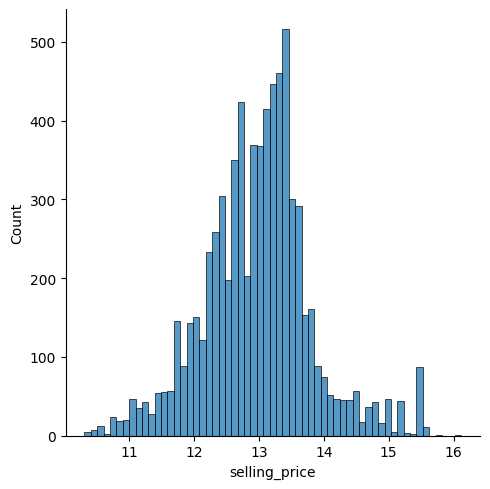

In [818]:
sns.displot(y_train)

In [819]:
#let's fill the NA's in the training set first!
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

#let's fill the NA's in the testing set!
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

X_train['max_power'].median()

np.float64(82.85)

In [820]:
#check again
X_train[['max_power', 'km_driven', 'year']].isna().sum()


max_power    0
km_driven    0
year         0
dtype: int64

In [821]:
#check again
X_test[['max_power', 'km_driven', 'year']].isna().sum()

max_power    0
km_driven    0
year         0
dtype: int64

In [822]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

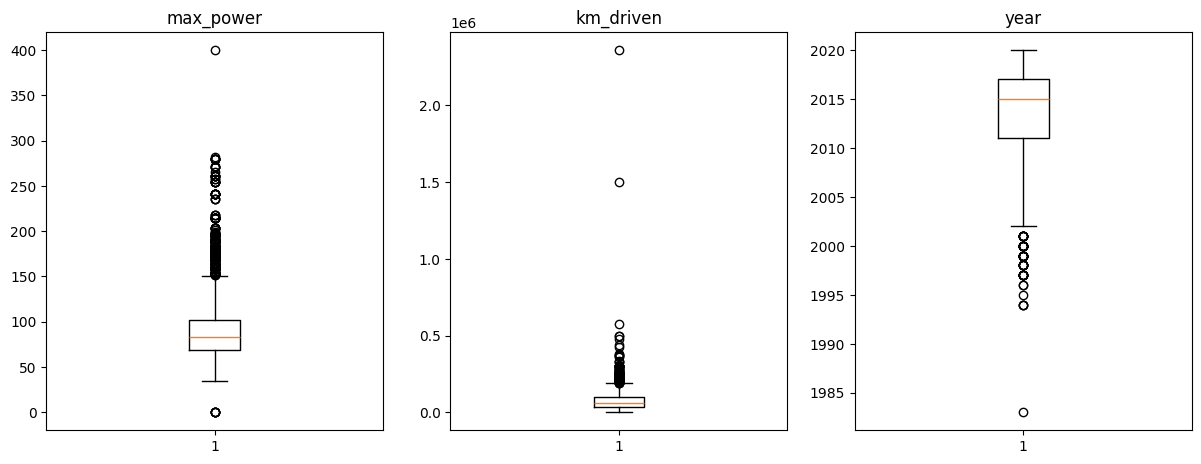

In [823]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'km_driven':2, 'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [824]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [825]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 519
Percent of data that is outlier: 7.18%

---------------km_driven---------------

Number of outliers: 142
Percent of data that is outlier: 1.97%

---------------year---------------

Number of outliers: 69
Percent of data that is outlier: 0.96%


In [826]:
print(X_train)

      max_power  km_driven  year
5385      82.85     100000  1997
3929      88.70      40000  2020
778      156.00     110000  2013
7794      88.50      50000  2015
3555      82.85      68300  2003
...         ...        ...   ...
5293      78.90      40000  2013
5461      67.04      39000  2016
865       88.76      14000  2015
7701     214.56      20000  2019
7366      83.10      21147  2018

[7225 rows x 3 columns]


### Scaling

In [827]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [828]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (7225, 3)
Shape of X_test:  (803, 3)
Shape of y_train:  (7225,)
Shape of y_test:  (803,)


In [829]:
print(X_train)

[[-0.24741717  0.5273773  -4.16299354]
 [-0.08249256 -0.51683229  1.5317919 ]
 [ 1.81484519  0.70141224 -0.20140367]
 ...
 [-0.08080103 -0.96932311  0.29379507]
 [ 3.46578276 -0.86490215  1.28419254]
 [-0.24036911 -0.84494034  1.03659317]]


## 6. Modelling

### Cross validation

In [830]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [831]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.11533234 -0.11500138 -0.11699966 -0.12008214 -0.12040929]; Mean: -0.11756496308277449
SVR - Score: [-0.10334674 -0.10075969 -0.08853466 -0.09961748 -0.10142875]; Mean: -0.09873746447258493
KNeighbors Regressor - Score: [-0.08955523 -0.10081467 -0.09659972 -0.08728781 -0.09921802]; Mean: -0.09469509134179227
Decision-Tree Regressor - Score: [-0.10147036 -0.11413655 -0.10496492 -0.09773914 -0.10226014]; Mean: -0.10411422321220418
Random-Forest Regressor - Score: [-0.07026678 -0.06404168 -0.07258995 -0.07026946 -0.07200812]; Mean: -0.06983519788886206


### Grid search

In [832]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'bootstrap': [True], 'max_depth': [5, 10, ...], 'n_estimators': [5, 6, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,15


In [833]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 15}

In [834]:
best_mse = grid.best_score_
best_mse

np.float64(-0.06880155946003794)

### Testing predicted with train set

In [835]:
# Change this code to get yhat in the original scale
y_pred_train = np.exp(grid.predict(X_train))
y_train = np.exp(y_train)

pd.options.display.float_format = '{:.2f}'.format  # Set to 2 decimal places
pd.DataFrame({'Actual Price:': y_train, 'Predicted Price:': y_pred_train})


,Actual Price:,Predicted Price:
5385,160000.00,111412.16
3929,500000.00,504519.55
778,1075000.00,991290.17
7794,550000.00,613791.16
3555,85000.00,70764.31
...,...,...
5293,300000.00,302592.16
5461,380000.00,359790.17
865,750000.00,615799.34
7701,5150000.00,5145453.38


In [836]:
# Checking the training set performance
MSE = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print("MSE: ", MSE)
print("R2 Score: ", r2)

MSE:  12901129851.680298
R2 Score:  0.9796236879314443


## 7. Testing

In [837]:
# Change this code to get yhat in the original scale
pred_y = grid.predict(X_test)
pred_y = np.exp(pred_y)

y_test = np.exp(y_test)

# Printing Actual vs Predicted values
pd.options.display.float_format = '{:.2f}'.format  # Set to 2 decimal places
pd.DataFrame({'Actual Price:': y_test, 'Predicted Price:': pred_y})


,Actual Price:,Predicted Price:
5948,225000.00,260126.74
6039,900000.00,906572.73
3069,320000.00,337085.91
6531,650000.00,535604.49
322,520000.00,617286.29
...,...,...
4415,5150000.00,5145453.38
5162,350000.00,382752.25
4091,2700000.00,1659666.24
4568,100000.00,130738.97


In [838]:
# Checking the test set performance
MSE = mean_squared_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)
print("MSE: ", MSE)
print("R2 Score: ", r2)

MSE:  19159465946.502346
R2 Score:  0.9742399442024029


In [839]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,Individual,1,1,23.40,1248.00,74.00,5.00
1,Skoda,2014,370000,120000,0,Individual,1,2,21.14,1498.00,103.52,5.00
2,Honda,2006,158000,140000,1,Individual,1,3,17.70,1497.00,78.00,5.00
3,Hyundai,2010,225000,127000,0,Individual,1,1,23.00,1396.00,90.00,5.00
4,Maruti,2007,130000,120000,1,Individual,1,1,16.10,1298.00,88.20,5.00


## 8. Analysis:  Feature Importance

### Algorithem Way 

In [840]:
#grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.493824  , 0.02678633, 0.47938968])

<BarContainer object of 3 artists>

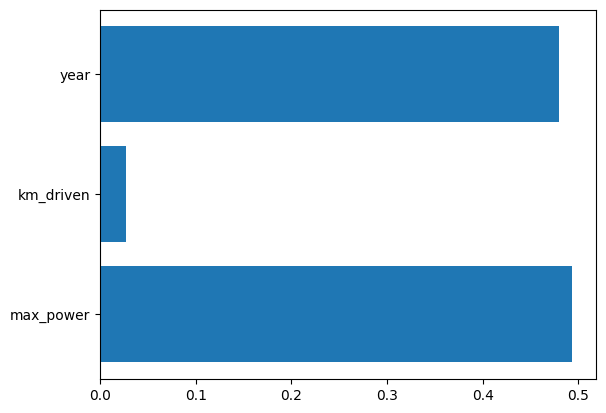

In [841]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

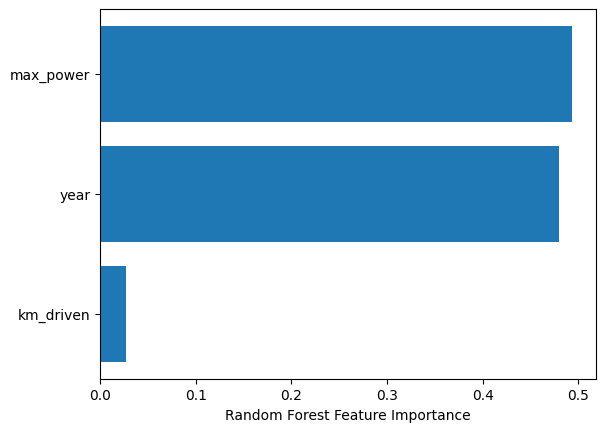

In [842]:
#Let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

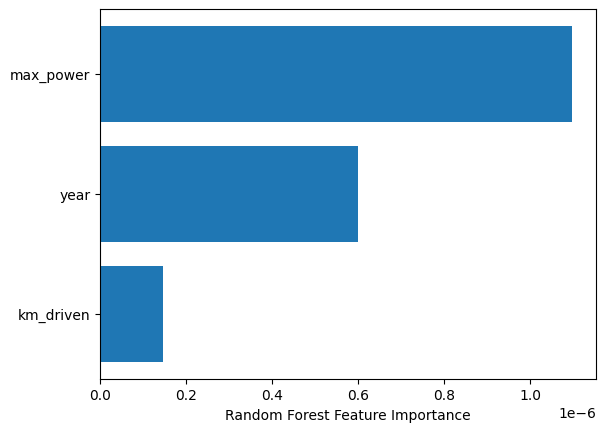

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 9. Inference

Saving the model for inference and deployment

In [844]:
import pickle

# save the model to disk
filename = 'car_price_model.pkl'
pickle.dump(grid, open(filename, 'wb'))
print(f"Model saved successfully to {filename}")

Model saved successfully to car_price_model.pkl


In [845]:
scalermodel = "scaler_model.pkl"
pickle.dump(scaler, open(scalermodel, 'wb'))
print(f"Model saved successfully to {scalermodel}")

Model saved successfully to scaler_model.pkl


In [846]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [847]:
#let's try to create one example
sample = df[['max_power','km_driven', 'year']].iloc[1].to_frame().T
sample
sample2 = [[200, 130000, 2019], [88, 30000, 1999]]

In [848]:
#[ 'max_power', 'km_driven', 'year' ]

predicted_car_price = np.exp(loaded_model.predict(scaler.transform(sample2)))
predicted_car_price


array([3946736.6808595 ,  108024.88283005])

# Task 2

When trying to predict a car's price, some features naturally have a bigger impact than others. Based on the data, and the corelations matrix - we can see that the Max_power and Year show a clear relationship with selling_price. In this model I have used Max_power, year and km_driven. Other columns that appear during exploration (brand, fuel, seller_type, transmission, owner, mileage, engine, seats) are not included in the final training matrix as they did not show promising relationship to the dependant variable which is selling_price. This can be seen on the multivariable boxplots above.

On the modeling side, a non linear, tree based approach performs best because it captures the curved relationships between year, km_driven, and max_power (with the target modeled on the log scale), which shows up in the prediction tables where estimates track actual prices closely across both low and high ranges; in comparison, a plain Linear Regression would be too rigid since it assumes one global linear relationship and would likely underfit these three features even after the log transform, while SVR can model non linearity but is very sensitive to scaling, making it easy to either under  or over fit without careful tuning, and k Nearest Neighbors tends to be unstable on these differently scaled numeric ranges and doesn’t extrapolate well. Overall, the tree style model is the most natural and reliable fit for this setup, and this can be seen on under modeling under cross validation- Random-Forest Regressor has the highest mean (close to 0) compared to the rest of the models.
